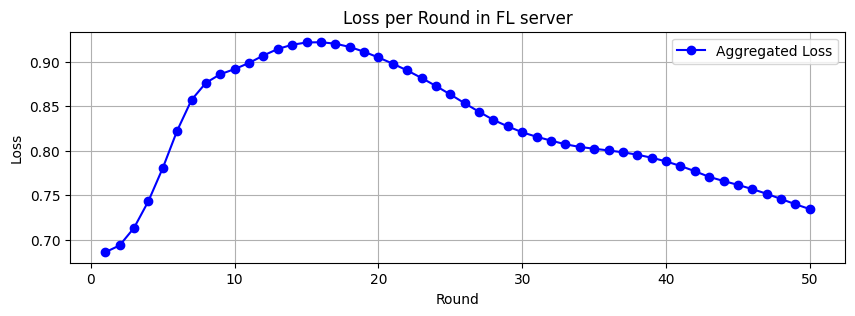

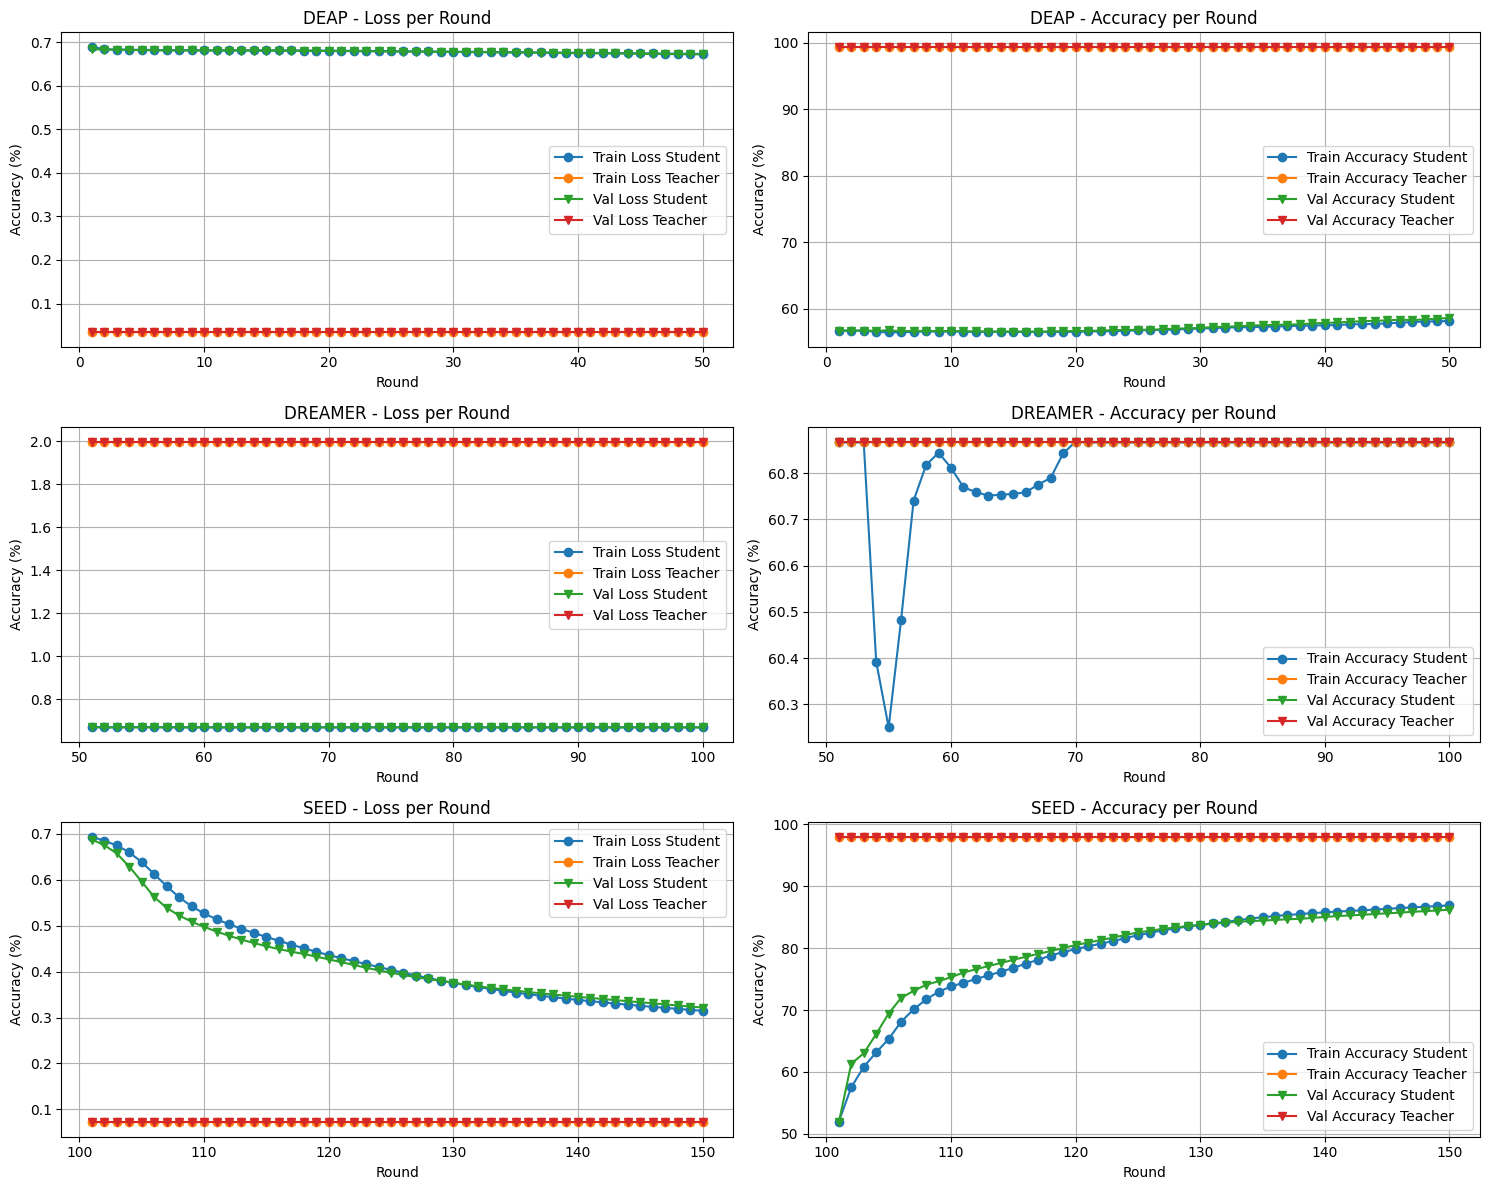

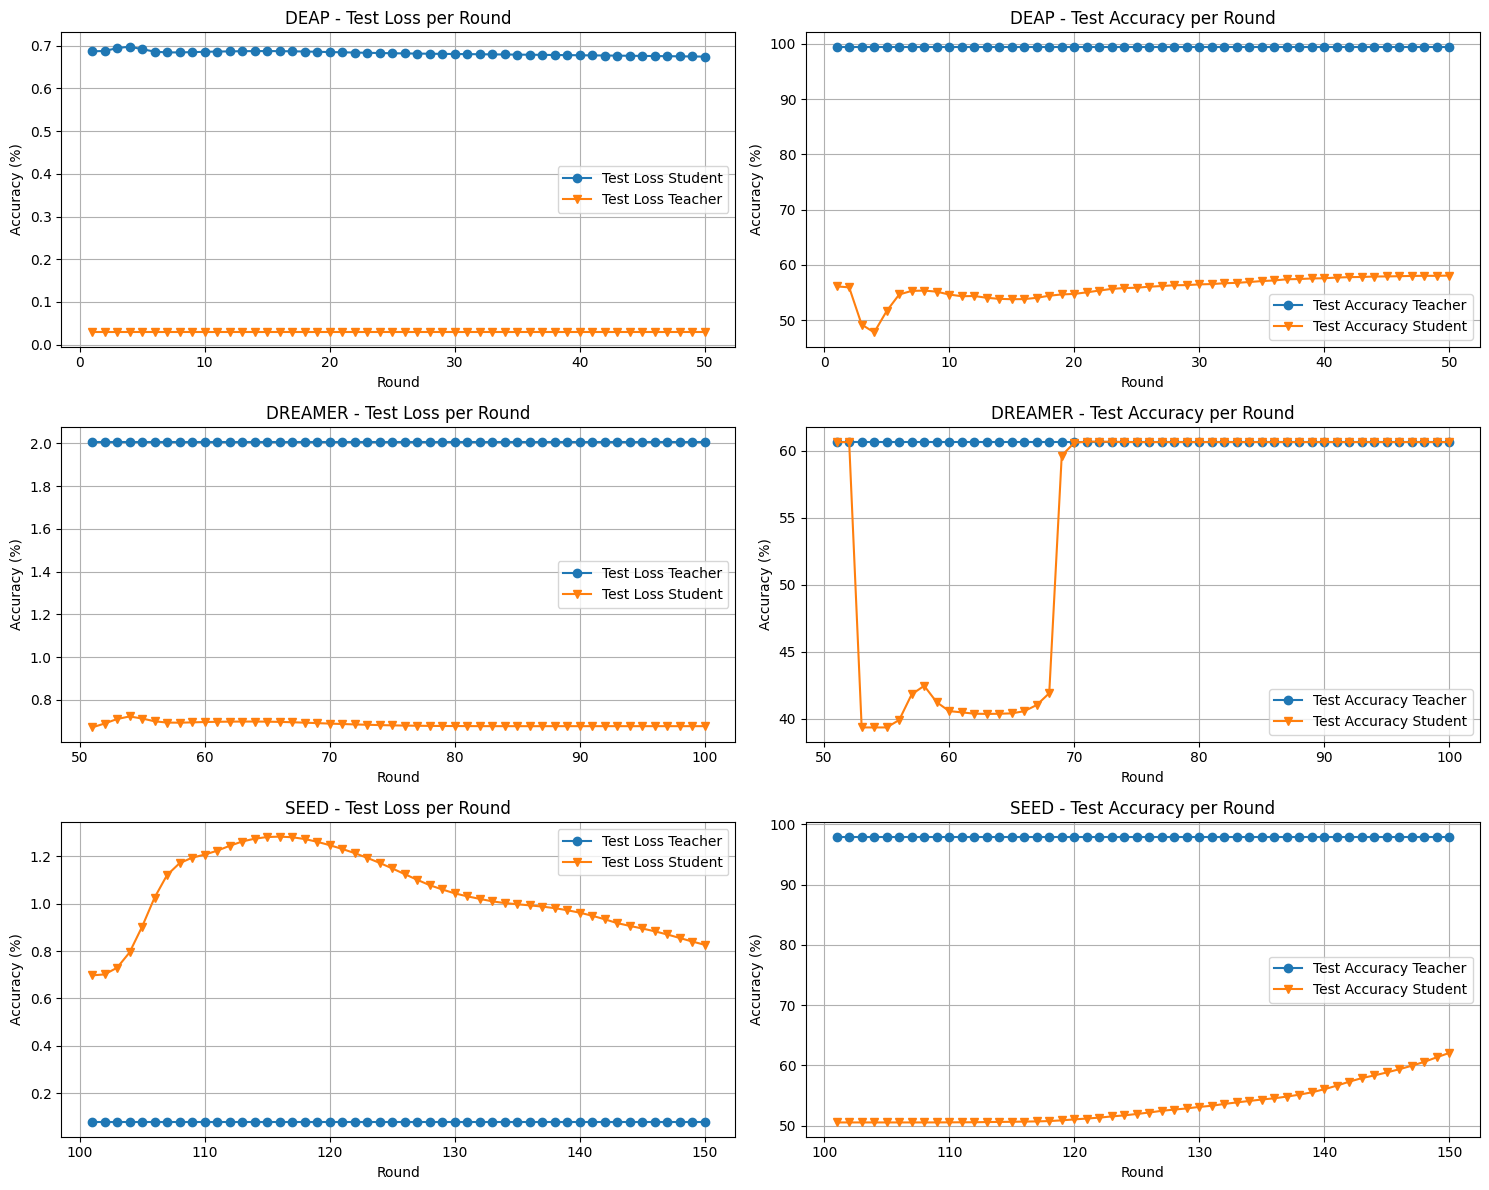

In [8]:
import re
import matplotlib.pyplot as plt

# Define the path to your log file
file_path = 'multirun/2024-11-13/14-16-58/0/main.log'  # Update this to your actual file path

import re

# Initialize lists to store the metrics
server_rounds, server_losses = [], []
train_accuracy_client, train_accuracy_server = [], []
train_loss_client, train_loss_server = [], []
val_accuracy_client, val_accuracy_server = [], []
val_loss_client, val_loss_server = [], []
test_accuracy_client, test_accuracy_server = [], []
test_loss_client, test_loss_server = [], []

# Define regex patterns and corresponding list names in a tuple
patterns = [
    (r"round (\d+): ([\d.]+)", server_losses), 
    (r"'train_accuracy_client':\s*([\d.]+)", train_accuracy_client),
    (r"'train_accuracy_server':\s*([\d.]+)", train_accuracy_server),
    (r"'train_loss_client':\s*([\d.]+)", train_loss_client),
    (r"'train_loss_server':\s*([\d.]+)", train_loss_server),
    (r"'val_accuracy_client':\s*([\d.]+)", val_accuracy_client),
    (r"'val_accuracy_server':\s*([\d.]+)", val_accuracy_server),
    (r"'val_loss_client':\s*([\d.]+)", val_loss_client),
    (r"'val_loss_server':\s*([\d.]+)", val_loss_server),
    (r"'test_accuracy_client':\s*([\d.]+)", test_accuracy_client),
    (r"'test_accuracy_server':\s*([\d.]+)", test_accuracy_server),
    (r"'test_loss_client':\s*([\d.]+)", test_loss_client),
    (r"'test_loss_server':\s*([\d.]+)", test_loss_server),
]

# Open the file and read lines
with open(file_path, 'r') as file:
    for line in file:
        for idx, (pattern, data_list) in enumerate(patterns):
            match = re.search(pattern, line)
            if match:
                if idx == 0:
                     server_rounds.append(int(match.group(1)))
                     data_list.append(float(match.group(2)))
                else:
                    data_list.append(float(match.group(1)))

# Create a list of rounds (1 to N, where N is the number of rounds)
rounds = list(range(1, len(train_accuracy_server) + 1)) # rounds per dataset x banyaknya dataset
ds_rounds = len(server_rounds) # rounds per dataset

# Plotting server metric
def plot_metric():
    plt.figure(figsize=(10, 3))
    plt.plot(server_rounds, server_losses, marker="o", color="b", label="Aggregated Loss")
    plt.title("Loss per Round in FL server")
    plt.xlabel("Round")
    plt.ylabel("Loss")
    # plt.xticks(server_rounds)  # Show every round on x-axis
    plt.grid()
    plt.legend()
    plt.show()

    # Plotting client metrics
    plt.figure(figsize=(15, 12))

    # Plotting the DEAP data
    plt.subplot(3, 2, 1)
    plt.plot(rounds[:ds_rounds], train_loss_server[:ds_rounds], label='Train Loss Student', marker='o')
    plt.plot(rounds[:ds_rounds], train_loss_client[:ds_rounds], label='Train Loss Teacher', marker='o')
    plt.plot(rounds[:ds_rounds], val_loss_server[:ds_rounds], label='Val Loss Student', marker='v')
    plt.plot(rounds[:ds_rounds], val_loss_client[:ds_rounds], label='Val Loss Teacher', marker='v')
    plt.title('DEAP - Loss per Round')
    plt.xlabel('Round')
    plt.ylabel('Accuracy (%)')
    # plt.xticks(rounds[:30])
    # plt.ylim(0, 100)  # Assuming accuracy is in percentage
    plt.grid()
    plt.legend()

    plt.subplot(3, 2, 2)
    plt.plot(rounds[:ds_rounds], train_accuracy_server[:ds_rounds], label='Train Accuracy Student', marker='o')
    plt.plot(rounds[:ds_rounds], train_accuracy_client[:ds_rounds], label='Train Accuracy Teacher', marker='o')
    plt.plot(rounds[:ds_rounds], val_accuracy_server[:ds_rounds], label='Val Accuracy Student', marker='v')
    plt.plot(rounds[:ds_rounds], val_accuracy_client[:ds_rounds], label='Val Accuracy Teacher', marker='v')
    plt.title('DEAP - Accuracy per Round')
    plt.xlabel('Round')
    plt.ylabel('Accuracy (%)')
    # plt.xticks(rounds[:30])
    # plt.ylim(0, 100)  # Assuming accuracy is in percentage
    plt.grid()
    plt.legend()

    # Plotting the DREAMER data
    plt.subplot(3, 2, 3)
    plt.plot(rounds[ds_rounds:2*ds_rounds], train_loss_server[ds_rounds:2*ds_rounds], label='Train Loss Student', marker='o')
    plt.plot(rounds[ds_rounds:2*ds_rounds], train_loss_client[ds_rounds:2*ds_rounds], label='Train Loss Teacher', marker='o')
    plt.plot(rounds[ds_rounds:2*ds_rounds], val_loss_server[ds_rounds:2*ds_rounds], label='Val Loss Student', marker='v')
    plt.plot(rounds[ds_rounds:2*ds_rounds], val_loss_client[ds_rounds:2*ds_rounds], label='Val Loss Teacher', marker='v')
    plt.title('DREAMER - Loss per Round')
    plt.xlabel('Round')
    plt.ylabel('Accuracy (%)')
    # plt.xticks(rounds[30:60])
    # plt.ylim(0, 100)  # Assuming accuracy is in percentage
    plt.grid()
    plt.legend()

    plt.subplot(3, 2, 4)
    plt.plot(rounds[ds_rounds:2*ds_rounds], train_accuracy_server[ds_rounds:2*ds_rounds], label='Train Accuracy Student', marker='o')
    plt.plot(rounds[ds_rounds:2*ds_rounds], train_accuracy_client[ds_rounds:2*ds_rounds], label='Train Accuracy Teacher', marker='o')
    plt.plot(rounds[ds_rounds:2*ds_rounds], val_accuracy_server[ds_rounds:2*ds_rounds], label='Val Accuracy Student', marker='v')
    plt.plot(rounds[ds_rounds:2*ds_rounds], val_accuracy_client[ds_rounds:2*ds_rounds], label='Val Accuracy Teacher', marker='v')
    plt.title('DREAMER - Accuracy per Round')
    plt.xlabel('Round')
    plt.ylabel('Accuracy (%)')
    # plt.xticks(rounds[30:60])
    # plt.ylim(0, 100)  # Assuming accuracy is in percentage
    plt.grid()
    plt.legend()

    # Plotting the SEED data
    plt.subplot(3, 2, 5)
    plt.plot(rounds[2*ds_rounds:], train_loss_server[2*ds_rounds:], label='Train Loss Student', marker='o')
    plt.plot(rounds[2*ds_rounds:], train_loss_client[2*ds_rounds:], label='Train Loss Teacher', marker='o')
    plt.plot(rounds[2*ds_rounds:], val_loss_server[2*ds_rounds:], label='Val Loss Student', marker='v')
    plt.plot(rounds[2*ds_rounds:], val_loss_client[2*ds_rounds:], label='Val Loss Teacher', marker='v')
    plt.title('SEED - Loss per Round')
    plt.xlabel('Round')
    plt.ylabel('Accuracy (%)')
    # plt.xticks(rounds[60:])
    # plt.ylim(0, 100)  # Assuming accuracy is in percentage
    plt.grid()
    plt.legend()

    plt.subplot(3, 2, 6)
    plt.plot(rounds[2*ds_rounds:], train_accuracy_server[2*ds_rounds:], label='Train Accuracy Student', marker='o')
    plt.plot(rounds[2*ds_rounds:], train_accuracy_client[2*ds_rounds:], label='Train Accuracy Teacher', marker='o')
    plt.plot(rounds[2*ds_rounds:], val_accuracy_server[2*ds_rounds:], label='Val Accuracy Student', marker='v')
    plt.plot(rounds[2*ds_rounds:], val_accuracy_client[2*ds_rounds:], label='Val Accuracy Teacher', marker='v')
    plt.title('SEED - Accuracy per Round')
    plt.xlabel('Round')
    plt.ylabel('Accuracy (%)')
    # plt.xticks(rounds[60:])
    # plt.ylim(0, 100)  # Assuming accuracy is in percentage
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plotting client metrics
    plt.figure(figsize=(15, 12))

    # Plotting the DEAP data
    plt.subplot(3, 2, 1)
    plt.plot(rounds[:ds_rounds], test_loss_server[:ds_rounds], label='Test Loss Student', marker='o')
    plt.plot(rounds[:ds_rounds], test_loss_client[:ds_rounds], label='Test Loss Teacher', marker='v')
    plt.title('DEAP - Test Loss per Round')
    plt.xlabel('Round')
    plt.ylabel('Accuracy (%)')
    # plt.xticks(rounds[:30])
    # plt.ylim(0, 100)  # Assuming accuracy is in percentage
    plt.grid()
    plt.legend()

    plt.subplot(3, 2, 2)
    plt.plot(rounds[:ds_rounds], test_accuracy_client[:ds_rounds], label='Test Accuracy Teacher', marker='o')
    plt.plot(rounds[:ds_rounds], test_accuracy_server[:ds_rounds], label='Test Accuracy Student', marker='v')
    plt.title('DEAP - Test Accuracy per Round')
    plt.xlabel('Round')
    plt.ylabel('Accuracy (%)')
    # plt.xticks(rounds[:30])
    # plt.ylim(0, 100)  # Assuming accuracy is in percentage
    plt.grid()
    plt.legend()

    # Plotting the DREAMER data
    plt.subplot(3, 2, 3)
    plt.plot(rounds[ds_rounds:2*ds_rounds], test_loss_client[ds_rounds:2*ds_rounds], label='Test Loss Teacher', marker='o')
    plt.plot(rounds[ds_rounds:2*ds_rounds], test_loss_server[ds_rounds:2*ds_rounds], label='Test Loss Student', marker='v')
    plt.title('DREAMER - Test Loss per Round')
    plt.xlabel('Round')
    plt.ylabel('Accuracy (%)')
    # plt.xticks(rounds[30:60])
    # plt.ylim(0, 100)  # Assuming accuracy is in percentage
    plt.grid()
    plt.legend()

    plt.subplot(3, 2, 4)
    plt.plot(rounds[ds_rounds:2*ds_rounds], test_accuracy_client[ds_rounds:2*ds_rounds], label='Test Accuracy Teacher', marker='o')
    plt.plot(rounds[ds_rounds:2*ds_rounds], test_accuracy_server[ds_rounds:2*ds_rounds], label='Test Accuracy Student', marker='v')
    plt.title('DREAMER - Test Accuracy per Round')
    plt.xlabel('Round')
    plt.ylabel('Accuracy (%)')
    # plt.xticks(rounds[30:60])
    # plt.ylim(0, 100)  # Assuming accuracy is in percentage
    plt.grid()
    plt.legend()

    # Plotting the SEED data
    plt.subplot(3, 2, 5)
    plt.plot(rounds[2*ds_rounds:], test_loss_client[2*ds_rounds:], label='Test Loss Teacher', marker='o')
    plt.plot(rounds[2*ds_rounds:], test_loss_server[2*ds_rounds:], label='Test Loss Student', marker='v')
    plt.title('SEED - Test Loss per Round')
    plt.xlabel('Round')
    plt.ylabel('Accuracy (%)')
    # plt.xticks(rounds[60:])
    # plt.ylim(0, 100)  # Assuming accuracy is in percentage
    plt.grid()
    plt.legend()

    plt.subplot(3, 2, 6)
    plt.plot(rounds[2*ds_rounds:], test_accuracy_client[2*ds_rounds:], label='Test Accuracy Teacher', marker='o')
    plt.plot(rounds[2*ds_rounds:], test_accuracy_server[2*ds_rounds:], label='Test Accuracy Student', marker='v')
    plt.title('SEED - Test Accuracy per Round')
    plt.xlabel('Round')
    plt.ylabel('Accuracy (%)')
    # plt.xticks(rounds[60:])
    # plt.ylim(0, 100)  # Assuming accuracy is in percentage
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metric()

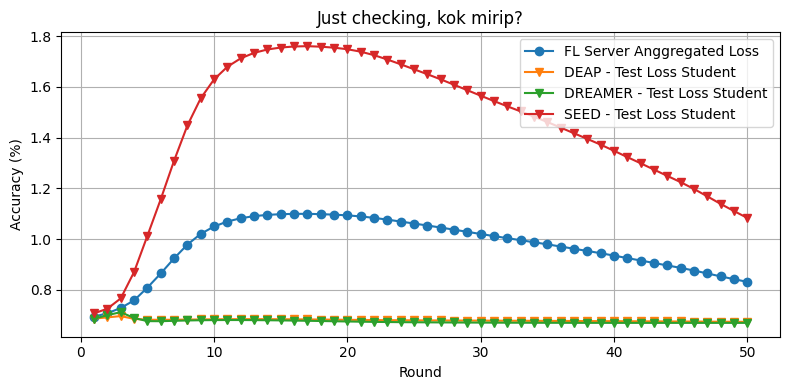

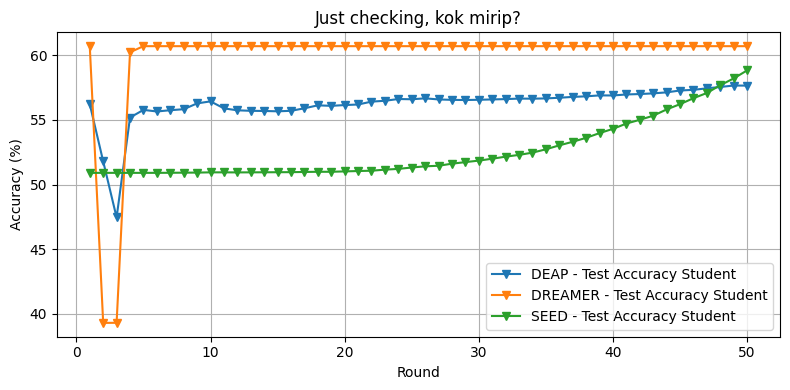

In [7]:
# print(server_losses)
# print(test_loss_server)

plt.figure(figsize=(8, 4))
plt.plot(server_rounds, server_losses, label='FL Server Anggregated Loss', marker='o')
plt.plot(rounds[:ds_rounds], test_loss_server[:ds_rounds], label='DEAP - Test Loss Student', marker='v')
plt.plot(rounds[:ds_rounds], test_loss_server[ds_rounds:2*ds_rounds], label='DREAMER - Test Loss Student', marker='v')
plt.plot(rounds[:ds_rounds], test_loss_server[2*ds_rounds:], label='SEED - Test Loss Student', marker='v')
plt.title('Just checking, kok mirip?')
plt.xlabel('Round')
plt.ylabel('Accuracy (%)')
# plt.xticks(rounds[60:])
# plt.ylim(0, 100)  # Assuming accuracy is in percentage
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
# plt.plot(server_rounds, server_losses, label='FL Server Anggregated Loss', marker='o')
plt.plot(rounds[:ds_rounds], test_accuracy_server[:ds_rounds], label='DEAP - Test Accuracy Student', marker='v')
plt.plot(rounds[:ds_rounds], test_accuracy_server[ds_rounds:2*ds_rounds], label='DREAMER - Test Accuracy Student', marker='v')
plt.plot(rounds[:ds_rounds], test_accuracy_server[2*ds_rounds:], label='SEED - Test Accuracy Student', marker='v')
plt.title('Just checking, kok mirip?')
plt.xlabel('Round')
plt.ylabel('Accuracy (%)')
# plt.xticks(rounds[60:])
# plt.ylim(0, 100)  # Assuming accuracy is in percentage
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()